# Ultimate guide to deal with Text Data (using Python) – for Data Scientists and Engineers

Source: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

SHUBHAM JAIN, FEBRUARY 27, 2018

__Import Libraries__

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [42]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
data = pd.read_csv('text_practice.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## 1. Basic Feature Extraction

### 1.1 Number of Words

One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

In [4]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(' ')))
data[['tweet', 'word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


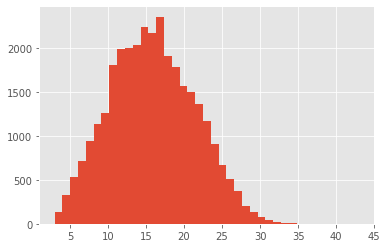

In [5]:
data['word_count'].hist(bins=int(np.sqrt(len(data) / 20)));

### 1.2 Number of Characters

Based on the same feature intuition as above.

In [6]:
data['char_count'] = data['tweet'].str.len()
data[['tweet', 'char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


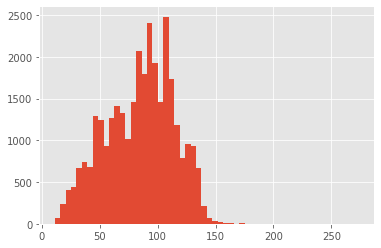

In [7]:
data['char_count'].hist(bins=int(np.sqrt(len(data) / 10)));

### 1.3 Average Word Length

In [8]:
def avg_word(sentence):
    words = sentence.split()
    return sum(len(word) for word in words) / len(words)

data['avg_word'] = data['tweet'].apply(avg_word)
data[['tweet', 'avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


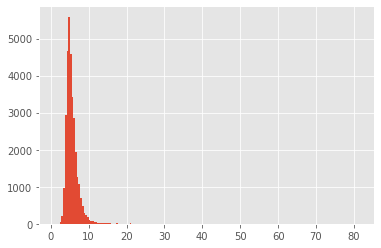

In [9]:
data['avg_word'].hist(bins=int(np.sqrt(len(data))));

In [10]:
data['avg_word'].describe()

count    31962.000000
mean         5.593463
std          1.945719
min          1.000000
25%          4.529412
50%          5.200000
75%          6.200000
max         81.333333
Name: avg_word, dtype: float64

In [11]:
longest_tweet = data.iloc[np.argmax(data['avg_word'])]

In [12]:
longest_tweet.tweet

'awesom beautiful wonderfulð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x8eð\x9f\x98\x8eð\x9f\x98\x8eð\x9f\x98\x8eð\x9f\x99\x8bð\x9f\x99\x8bð\x9f\x99\x8bð\x9f\x99\x8fð\x9f\x99\x8fð\x9f\x99\x8fð\x9f\x99\x8fð\x9f\x98»ð\x9f\x98»ð\x9f\x98»ð\x9f\x98» '

### !.4 Number of Stopwords

Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords_count'] = data['tweet'].apply(lambda sentence: len([word for word in sentence.split() if word in stop]))
data[['tweet', 'stopwords_count']].head()

,tweet,stopwords_count
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


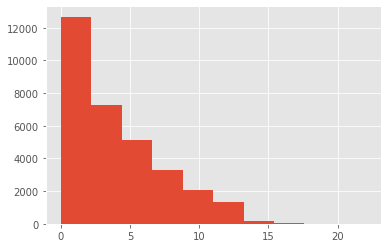

In [14]:
data['stopwords_count'].hist();

### 1.5 Number of Special Characters

One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

In [15]:
def count_hastags_mentions(sentence):
    words = [word for word in sentence.split() if word.startswith('@') or word.startswith('#')]
    return len(words)

data['hashtags_mentions_count'] = data['tweet'].apply(count_hastags_mentions)
data[['tweet', 'hashtags_mentions_count']].head()

,tweet,hashtags_mentions_count
0,@user when a father is dysfunctional and is s...,2
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


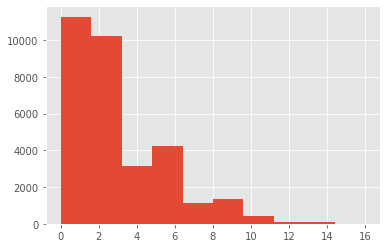

In [16]:
data['hashtags_mentions_count'].hist();

### 1.6 Number of Numerics

In [17]:
data['numerics_count'] = data['tweet'].apply(lambda sentence: len([word for word in sentence.split() if word.isdigit()]))
data[['tweet', 'numerics_count']].head()

,tweet,numerics_count
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


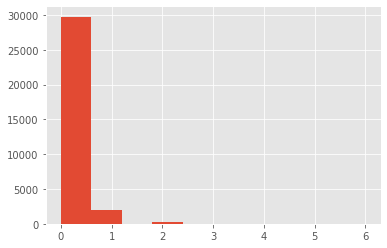

In [18]:
data['numerics_count'].hist();

### 1.7 Number of Uppercase Words

Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [19]:
data['upper_count'] = data['tweet'].apply(lambda sentence: len([word for word in sentence.split() if word.isupper()]))
data[['tweet', 'upper_count']].head()

,tweet,upper_count
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


---

## 2. Basic Preprocessing

### 2.1 Lowercase

In [20]:
data['tweet'] = data['tweet'].apply(lambda sentence: sentence.lower())
data[['tweet']].head()

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


### 2.2 Removing Punctuation

In [21]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
table = str.maketrans('', '', string.punctuation)
data['tweet'] = data['tweet'].apply(lambda sentence: sentence.translate(table))
data[['tweet']].head()

,tweet
0,user when a father is dysfunctional and is so...
1,user user thanks for lyft credit i cant use ca...
2,bihday your majesty
3,model i love u take with u all the time in u...
4,factsguide society now motivation


### 2.3 Removal of Stop Words

In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['tweet'] = data['tweet'].apply(lambda sentence: " ".join(word for word in sentence.split() if word not in stop_words))
data[['tweet']].head()

,tweet
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð± ðððð...
4,factsguide society motivation


### 2.4 Common Words Removal

In [30]:
freq = pd.Series(' '.join(data['tweet']).split()).value_counts(normalize=True)
common = freq[:10]

In [32]:
common = common.index
data['tweet'] = data['tweet'].apply(lambda sentence: ' '.join(word for word in sentence.split() if word not in common))
data['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3       model take urð± ðððð ð¦ð¦ð¦
4                        factsguide society motivation
Name: tweet, dtype: object

### 2.5 Rare Words Removal

In [34]:
rare = freq[-10:]
data['tweet'] = data['tweet'].apply(lambda sentence: ' '.join(word for word in sentence.split() if word not in rare))
data['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3       model take urð± ðððð ð¦ð¦ð¦
4                        factsguide society motivation
Name: tweet, dtype: object

### 2.6 Spelling Correction

In [36]:
from textblob import TextBlob
data['tweet'][:5].apply(lambda sentence: str(TextBlob(sentence).correct()))

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit can use cause dont offer wh...
2                                       midday majesty
3        model take or± ðððð ð¦ð¦ð¦
4                        factsguide society motivation
Name: tweet, dtype: object

### 2.7 Tokenization

In [39]:
TextBlob(data['tweet'][0]).words

WordList(['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'])

### 2.8 Stemming

Removal of suffixes.

In [40]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data['tweet'][:5].apply(lambda sentence: ' '.join(stemmer.stem(word) for word in sentence.split()))

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit cant use caus dont offer whe...
2                                       bihday majesti
3       model take urð± ðððð ð¦ð¦ð¦
4                              factsguid societi motiv
Name: tweet, dtype: object

### Lemmatization

Converts word into its root form.

In [43]:
from textblob import Word
data['tweet'] = data['tweet'].apply(lambda sentence: ' '.join(Word(word).lemmatize() for word in sentence.split()))
data[['tweet']].head()

,tweet
0,father dysfunctional selfish drag kid dysfunct...
1,thanks lyft credit cant use cause dont offer w...
2,bihday majesty
3,model take urð± ðððð ð¦ð¦ð¦
4,factsguide society motivation


----

## 3 Advance Text Processing

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [44]:
TextBlob(data['tweet'][0]).ngrams(2)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drag']),
 WordList(['drag', 'kid']),
 WordList(['kid', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

### 3.2 Term Frequency

In [53]:
tf1 = data['tweet'][:5].apply(lambda sentence: pd.value_counts(sentence.split())).sum().reset_index()
tf1.columns = ['words', 'tf']
tf1['tf'] = tf1['tf'].astype(int)
tf1.head()

,words,tf
0,father,1
1,selfish,1
2,run,1
3,dysfunctional,1
4,drag,1


### 3.3 Inverse Document Frequency

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [56]:
for i, word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(len(data) / data['tweet'].str.contains(word).sum())
tf1.head()

,words,tf,idf
0,father,1,3.475609
1,selfish,1,7.664253
2,run,1,4.642203
3,dysfunctional,1,10.372303
4,drag,1,6.346951


### 3.4 Term Frequency - Inverse Document Frequency

In [57]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tfidf
0,father,1,3.475609,3.475609
1,selfish,1,7.664253,7.664253
2,run,1,4.642203,4.642203
3,dysfunctional,1,10.372303,10.372303
4,drag,1,6.346951,6.346951


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(data['tweet'][:5])

<5x28 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

### 3.5 Bag of Words

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(data['tweet'][:5])

<5x28 sparse matrix of type '<class 'numpy.int64'>'
	with 28 stored elements in Compressed Sparse Row format>

### 3.6 Sentiment Analysis

In [61]:
data.loc[:5, 'tweet'].apply(lambda x: TextBlob(x).sentiment)

0    (-0.3, 0.5354166666666667)
1                    (0.2, 0.2)
2                    (0.0, 0.0)
3                    (0.0, 0.0)
4                    (0.0, 0.0)
5    (0.20000000000000004, 0.5)
Name: tweet, dtype: object

In [62]:
data['sentiment'] = data['tweet'].apply(lambda x: TextBlob(x).sentiment)
data[['tweet', 'sentiment']].head()

,tweet,sentiment
0,father dysfunctional selfish drag kid dysfunct...,"(-0.3, 0.5354166666666667)"
1,thanks lyft credit cant use cause dont offer w...,"(0.2, 0.2)"
2,bihday majesty,"(0.0, 0.0)"
3,model take urð± ðððð ð¦ð¦ð¦,"(0.0, 0.0)"
4,factsguide society motivation,"(0.0, 0.0)"
